In [1]:
import numpy as np
import pandas as pd
import scipy as sp
import matplotlib.pyplot as plt
import seaborn as sns
import os 
from IPython.display import display, HTML
from matplotlib.backends.backend_pdf import PdfPages
%matplotlib inline
sns.set_style("whitegrid")
import itertools
from collections import Counter
from os.path import isfile, join
from random import randint, shuffle
import itertools
import warnings
warnings.filterwarnings("ignore")
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

In [2]:
def rabalta_true(df1):
    df = df1.copy()
    df = df.stack().to_frame().reset_index()
    df.columns = ['system', 'topic', 'AP']
    cols_top = df['system'].values
    cols_top = [x.replace('_', '.') for x in cols_top]
    cols_meth = df['topic'].values
    col_idx_arr = list(zip(cols_top, cols_meth))
    col_idx = pd.MultiIndex.from_tuples(col_idx_arr)
    df.index = col_idx
    df.index = [df.index.get_level_values(0), df.index.map('{0[0]}_{0[1]}'.format)]
    df.reset_index(inplace=True)
    df.drop('level_0', 1, inplace=True)
    df.rename(columns={'level_1': 'IND'}, inplace=True)
    df.set_index('IND', inplace=True)
    return df

def move_column(df1, coltomove, position):
    df = df1.copy()
    cols = list(df)
    # move the column to head of list using index, pop and insert
    cols.insert(position, cols.pop(cols.index(coltomove)))
    df = df.ix[:, cols]
    return df

def rank(x, top_heavy):
    rank = []
    if top_heavy:
        sorted_x = sorted(x)
    else:
        sorted_x = sorted(x, reverse=True)
    for element in x:
        rank.append(len(x) - sorted_x.index(element))
    return rank

def tauAP(a, b, top_heavy=True):
    n = len(a)
    ra = rank(a, top_heavy)
    rb = rank(b, top_heavy)
    numerator = 0
    
    for i in range(0, n-1):
        for j in range(i+1, n):
            sa = np.sign(a[i] - a[j])
            sb = np.sign(b[i] - b[j])
            if (sa == sb):
                numerator += 1 / (max(rb[i], rb[j]) - 1)
            
    return round(2 * numerator / (n - 1) - 1, 2)

def norm01(x):
    mi = min(x)
    ma = max(x)
    ma_mi = ma-mi
    x = np.array(x)
    x = (x-mi)/ma_mi
    return x

def dist(x,y):
    x = norm01(x)
    y = norm01(y)
    re = ( np.sum(np.abs(x-y)) )/ (  len(x)   )
    return re

In [30]:
collections =  [ 'TREC3', 'TREC5', 'TREC6', 'TREC7', 'AH99', 'TREC2001', 'R04', 'TB04', 'R05', 'TB05', 'TB06', 'WEB11', 'WEB12', 'WEB13', 'WEB14gd']

map_collection = {
    'AH99': 'TREC8',
    'TREC2001': 'TREC01',
    'WEB11': 'W11', 
    'WEB12': 'W12',
    'WEB13': 'W13', 
    'WEB14gd': 'W14',
    
       }
import collections as Kollections
map_method = Kollections.OrderedDict({
    'SOBOROFF': 'SNC', 
    
    'WUCBASIC': 'WUCv0', 
    'WUCV1': 'WUCv1',
    'WUCV2': 'WUCv2', 
    'WUCV3': 'WUCv3', 
    'WUCV4': 'WUCv4',
    
    'ASLAM': 'AS', 
    
    'NurayNormalRankPosition30': 'NC-NRP', 
    'NurayNormalBorda30': 'NC-NB',
    'NurayNormalCondorcet30': 'NC-NC', 
    
    'NurayBiasRankPosition30': 'NC-BRP', 
    'NurayBiasBorda30': 'NC-BB', 
    'NurayBiasCondorcet30': 'NC-BC',
    
    'SINGLE': 'SPO-S', 
    'ALLFIVE': 'SPO-A', 
    'SINGLEMINUSALLFIVE': 'SPO-SA', 
    
    'SAKAI30': 'SL',
    
    'blankSpace': '',
    'blank': '',
    
    'CombinoAP_Borda':'AP-B',
    'CombinoAP_Condorcet':'AP-C',
    'CombinoAP_Rank':'AP-RP', 
    'CombinoAP_media':'AP-AVG', 
    
    'Combino_MAP_media':'MAP-AVG',
    'Combino_MAP_Borda':'MAP-B',
    'Combino_MAP_Condorcet':'MAP-C',
    'Combino_MAP_Rank':'MAP-RP',
        
    'Combino_AAP_media':'AAP-AVG',
    'Combino_AAP_Borda':'AAP-B',
    'Combino_AAP_Condorcet':'AAP-C',
    'Combino_AAP_Rank':'AAP-RP',
    
    'Combino_MAP_SENZA_media':'MAP-AVGs',
    'Combino_MAP_SENZA_Borda':'MAP-Bs',
    'Combino_MAP_SENZA_Condorcet':'MAP-Cs',
    'Combino_MAP_SENZA_Rank':'MAP-RPs', 
    
    'NET': 'NN',
    'SVM_POLY': 'SVM-P',
    'SVM_RBF':'SVM-E',
    'moreSimilar': 'SVM-E1', 
    'SVM_RBF_2SIM': 'SVM-E2',
     'k-LR': 'LR',
    'LR': 'LR',
     'RF': 'RF',
    'k-RIDGE': 'RIDGE',
    'k-BAYRIDGE': 'BAYRIDGE',
    'k-LASSO': 'LASSO',
    'alex-NN-10ep-mae': 'NN-10-MAE',
    'alex-NN-mse': 'NN-100-MSE',
    'alex-NN-10ep-mse': 'NN-10-MSE',
    'alex-DNN-mse': 'DNN',
       })


features = ['SOBOROFF', 
            'WUCBASIC', 'WUCV1','WUCV2', 'WUCV3', 'WUCV4',
            'ASLAM', 
            'NurayNormalRankPosition30', 'NurayNormalBorda30','NurayNormalCondorcet30', 
            'NurayBiasRankPosition30', 'NurayBiasBorda30', 'NurayBiasCondorcet30',
            'SINGLE',  'ALLFIVE', 'SINGLEMINUSALLFIVE', 
            'SAKAI30']

In [24]:
df_features = pd.read_pickle('../../src/FEATURE_DF.pickle')

df_combinoAP = pd.read_pickle('../_pickles/Matrici_on_AP.pickle')
df_combinoAP['kind'] = ['CombinoAP_'+x for x in df_combinoAP['kind']]
#display(df_combinoAP.head(2))

df_combinoMAP = pd.read_pickle('../_pickles/Matrici_on_MAP.pickle')
df_combinoMAP['kind'] = ['Combino_MAP_'+x for x in df_combinoMAP['kind']]
#display(df_combinoMAP.head(2))

df_combinoMAPsf = pd.read_pickle('../_pickles/Matrici_on_MAP_senza5.pickle')
df_combinoMAPsf['kind'] = ['Combino_MAP_SENZA_'+x for x in df_combinoMAPsf['kind']]
#display(df_combinoMAP.head(2))

df_combinoAAP = pd.read_pickle('../_pickles/Matrici_on_AAP.pickle')
df_combinoAAP['kind'] = ['Combino_AAP_'+x for x in df_combinoAAP['kind']]
#display(df_combinoMAP.head(2))

df_machl = pd.read_pickle('../_pickles/PSEUDOTL_AP_AllPrec.pickle')
#display(df_machl.head(2))

#df_similar = pd.read_pickle('./pickles/Matrici_MoreSimilar_Imbroglio.pickle')
#display(df_similar.head(2))

df_similar1 = pd.read_pickle('../_pickles/Matrici_MoreSimilar.pickle')
#display(df_similar.head(2))

df_similar2 = pd.read_pickle('../_pickles/Matrici_2MoreSimilar.pickle')

df_similar3 = pd.read_pickle('../_pickles/Matrici_3MoreSimilar.pickle')
df_similar3['kind'] = [x.replace('SVM_RBF_2SIM', 'SVM_RBF_3SIM') for x in df_similar3['kind']]
#display(df_similar3.head(2))

df_exp = pd.read_pickle('../_pickles/k-LR.pickle')
df_exp1 = pd.read_pickle('../_pickles/k-RIDGE.pickle')
df_exp2 = pd.read_pickle('../_pickles/k-LASSO.pickle')
df_exp3 = pd.read_pickle('../_pickles/k-BAYRIDGE.pickle')
df_exp4 = pd.read_pickle('../_pickles/k-LASSOLARS.pickle')
df_exp5 = pd.read_pickle('../_pickles/k-SVMRBF.pickle')
df_exp6 = pd.read_pickle('../_pickles/alex-NN-10ep-mae.pickle')
df_exp7 = pd.read_pickle('../_pickles/alex-NN-10ep-mse.pickle')
df_exp8 = pd.read_pickle('../_pickles/alex-NN-mse.pickle')
df_exp9 = pd.read_pickle('../_pickles/alex-DNN-mse.pickle')


df_ml = pd.concat([df_combinoAP, df_combinoMAP, df_combinoMAPsf, df_combinoAAP, 
                   df_machl, df_similar1, df_similar2, df_similar3,
                   df_exp, df_exp1, df_exp2, df_exp3, df_exp4, df_exp5, df_exp6, df_exp7,df_exp8,df_exp9
                  ])

display(df_features.head(2))
display(df_ml.head(2))

display(np.unique(df_ml['kind']))

,AP_true,collection,method,system,topic,value
acqnt1_190,0.0043,TREC3,SOBOROFF,acqnt1,190,0.0088
acqnt1_190,0.0043,TREC3,SINGLE,acqnt1,190,-86.48


,train_on,eval_on,improve_kind,kind,df
0,none,TREC3,base,CombinoAP_media,system topic actual predicted IN...
1,none,TREC3,base,CombinoAP_Rank,system topic actual predicted IN...


array(['CombinoAP_Borda', 'CombinoAP_Condorcet', 'CombinoAP_Rank',
       'CombinoAP_media', 'Combino_AAP_Borda', 'Combino_AAP_Condorcet',
       'Combino_AAP_Rank', 'Combino_AAP_media', 'Combino_MAP_Borda',
       'Combino_MAP_Condorcet', 'Combino_MAP_Rank',
       'Combino_MAP_SENZA_Borda', 'Combino_MAP_SENZA_Condorcet',
       'Combino_MAP_SENZA_Rank', 'Combino_MAP_SENZA_media',
       'Combino_MAP_media', 'LIBSVM', 'LR', 'LR_2SIM', 'M5P', 'M5P_2SIM',
       'NET', 'NET_2SIM', 'RF', 'RF_2SIM', 'SVM_POLY', 'SVM_POLY_2SIM',
       'SVM_RBF', 'SVM_RBF_2SIM', 'SVM_RBF_3SIM', 'alex-DNN-mse',
       'alex-NN-10ep-mae', 'alex-NN-10ep-mse', 'alex-NN-mse',
       'k-BAYRIDGE', 'k-LASSO', 'k-LASSOLARS', 'k-LR', 'k-RIDGE',
       'k-SVMRBF', 'moreSimilar'], dtype=object)

In [25]:
df = pd.DataFrame(columns=['collection', 'method', 'algorithm' ,'apmap', 'kindcorr', 'corr', 'x'])

meth_features = list(np.unique(df_features['method']))


#meth_algorithms = np.unique(df_ml['kind'])
#meth_algorithms = ['CombinoAP_media',  'CombinoAP_Rank', 'CombinoAP_Borda', 'CombinoAP_Condorcet',
#                   'Combino_AAP_media','Combino_AAP_Rank', 'Combino_AAP_Borda', 'Combino_AAP_Condorcet',
#                   'Combino_MAP_media','Combino_MAP_Rank','Combino_MAP_Borda','Combino_MAP_Condorcet', 
#                   'Combino_MAP_SENZA_media', 'Combino_MAP_SENZA_Rank', 'Combino_MAP_SENZA_Borda', 'Combino_MAP_SENZA_Condorcet',
#                   'LR', 'M5P', 'NET', 'RF', 'SVM_POLY', 'SVM_RBF', 'blankSpace' ,
#                   'moreSimilar', 
#                   #'LR_2SIM', 'M5P_2SIM', 'NET_2SIM', 'RF_2SIM', 'SVM_POLY_2SIM', 
#                   'SVM_RBF_2SIM', 'SVM_RBF_3SIM', 'k-LR', 'k-RIDGE', 'k-LASSO', 'k-LASSOLARS', 'k-BAYRIDGE', 'k-SVMRBF', 'alex-NN-10ep-mae']

meth_algorithms = ['CombinoAP_media',  'CombinoAP_Rank', 'CombinoAP_Borda', 'CombinoAP_Condorcet',
                   'Combino_AAP_media','Combino_AAP_Rank', 'Combino_AAP_Borda', 'Combino_AAP_Condorcet',
                   'Combino_MAP_media','Combino_MAP_Rank','Combino_MAP_Borda','Combino_MAP_Condorcet', 
                   'Combino_MAP_SENZA_media', 'Combino_MAP_SENZA_Rank', 'Combino_MAP_SENZA_Borda', 'Combino_MAP_SENZA_Condorcet',
                   'k-LR', 'RF','k-RIDGE',  'k-BAYRIDGE', 'k-LASSO', 
                   'alex-NN-mse', 'alex-NN-10ep-mse', 'alex-NN-10ep-mae', 'alex-DNN-mse',
                   'SVM_POLY', 'SVM_RBF', 
                   'blankSpace' , 'moreSimilar','SVM_RBF_2SIM' ]

for collection in collections[1:]:
    print('working on {}'.format(collection))
    
    # single features
    au=1
    for feature in (meth_features):        
        aux_feature = df_features[(df_features['collection']==collection)&(df_features['method']==feature)]
        
        # AP
        x = aux_feature['AP_true']
        y = aux_feature['value']
        rho = sp.stats.pearsonr(x,y)[0]
        tau = sp.stats.kendalltau(x,y)[0]
        rs = sp.stats.spearmanr(x,y)[0]
        df.loc[len(df)] = [collection, feature, 'feature' ,'ap', 'rho', rho , au]
        df.loc[len(df)] = [collection, feature, 'feature' ,'ap', 'tau', tau , au]
        df.loc[len(df)] = [collection, feature, 'feature' ,'ap', 'R_s', rs , au]
        
        # DIST
        df.loc[len(df)] = [collection, feature, 'feature' ,'ap', 'delta', dist(x,y) , au]
        
        # MAP
        x = aux_feature.pivot('system', 'topic', 'AP_true').mean(1).values
        y = aux_feature.pivot('system', 'topic', 'value').mean(1).values
        rho = sp.stats.pearsonr(x,y)[0]
        tau = sp.stats.kendalltau(x,y)[0]
        rs = sp.stats.spearmanr(x,y)[0]
        tauap = tauAP(x,y)    
        df.loc[len(df)] = [collection, feature, 'feature' , 'map', 'rho', rho , au]
        df.loc[len(df)] = [collection, feature, 'feature' , 'map', 'tau', tau , au]
        df.loc[len(df)] = [collection, feature, 'feature' , 'map', 'R_s', rs , au]
        df.loc[len(df)] = [collection, feature, 'feature' , 'map', 'tau_AP', tauap , au]
        
        # AAP
        x = aux_feature.pivot('system', 'topic', 'AP_true').mean(0).values
        y = aux_feature.pivot('system', 'topic', 'value').mean(0).values
        rho = sp.stats.pearsonr(x,y)[0]
        tau = sp.stats.kendalltau(x,y)[0]
        rs = sp.stats.spearmanr(x,y)[0]
        tauap = tauAP(x,y)
        df.loc[len(df)] = [collection, feature, 'feature' , 'aap', 'rho', rho , au]
        df.loc[len(df)] = [collection, feature, 'feature' , 'aap', 'tau', tau , au]
        df.loc[len(df)] = [collection, feature, 'feature' , 'aap', 'R_s', rs , au]
        #df.loc[len(df)] = [collection, feature, 'feature' , 'aap', 'tau_AP', tauap , au]
        au +=1

    
    # ML    
    for alg in (meth_algorithms):
        aux_alg = df_ml[(df_ml['kind']==alg)&(df_ml['eval_on']==collection)]
        
        if aux_alg.shape[0]==0:
            continue
        
        second_meth = np.unique(aux_alg['train_on'])
        if len(second_meth)>1:
            display(aux_alg)
            assert False
        for sn in second_meth:
            aux = aux_alg[aux_alg['train_on'] == sn]['df'].values[0]
        
            # AP
            x = aux['actual']
            y = aux['predicted']
            rho = sp.stats.pearsonr(x,y)[0]
            tau = sp.stats.kendalltau(x,y)[0]
            rs = sp.stats.spearmanr(x,y)[0]
            df.loc[len(df)] = [collection, ''+str(alg), alg,'ap', 'rho', rho , au]
            df.loc[len(df)] = [collection, ''+str(alg), alg,'ap', 'tau', tau , au]
            df.loc[len(df)] = [collection, ''+str(alg), alg,'ap', 'R_s', rs , au]
            
            # DIST
            df.loc[len(df)] = [collection, ''+str(alg), alg ,'ap', 'delta', dist(x,y) , au]
            
            # MAP
            x = aux.pivot('system', 'topic', 'actual').mean(1).values
            y = aux.pivot('system', 'topic', 'predicted').mean(1).values
            rho = sp.stats.pearsonr(x,y)[0]
            tau = sp.stats.kendalltau(x,y)[0]
            rs = sp.stats.spearmanr(x,y)[0]
            tauap = tauAP(x,y)
            df.loc[len(df)] = [collection, ''+str(alg), alg, 'map', 'rho', rho , au]
            df.loc[len(df)] = [collection, ''+str(alg), alg, 'map', 'tau', tau , au]
            df.loc[len(df)] = [collection, ''+str(alg), alg, 'map', 'R_s', rs , au]
            df.loc[len(df)] = [collection, ''+str(alg), alg, 'map', 'tau_AP', tauap , au]
            
            # AAP
            x = aux.pivot('system', 'topic', 'actual').mean(0).values
            y = aux.pivot('system', 'topic', 'predicted').mean(0).values
            
            # patch
            if len(np.unique(y)) ==1:
                y[0] += 0.001
            
            rho = sp.stats.pearsonr(x,y)[0]
            tau = sp.stats.kendalltau(x,y)[0]
            rs = sp.stats.spearmanr(x,y)[0]
            #tauap = tauAP(x,y)
            df.loc[len(df)] = [collection, ''+str(alg), alg, 'aap', 'rho', rho , au]
            df.loc[len(df)] = [collection, ''+str(alg), alg, 'aap', 'tau', tau , au]
            df.loc[len(df)] = [collection, ''+str(alg), alg, 'aap', 'R_s', rs , au]
            #df.loc[len(df)] = [collection, ''+str(alg), alg, 'aap', 'tau_AP', tauap , au]
            
            au +=1
            
df.drop('x', 1, inplace=True)
display(df.head(2))

working on TREC5
working on TREC6
working on TREC7
working on AH99
working on TREC2001
working on R04
working on TB04
working on R05
working on TB05
working on TB06
working on WEB11
working on WEB12
working on WEB13
working on WEB14gd


,collection,method,algorithm,apmap,kindcorr,corr
0,TREC5,ALLFIVE,feature,ap,rho,0.249950
1,TREC5,ALLFIVE,feature,ap,tau,0.281729


### HUE METHOD

ap-rho


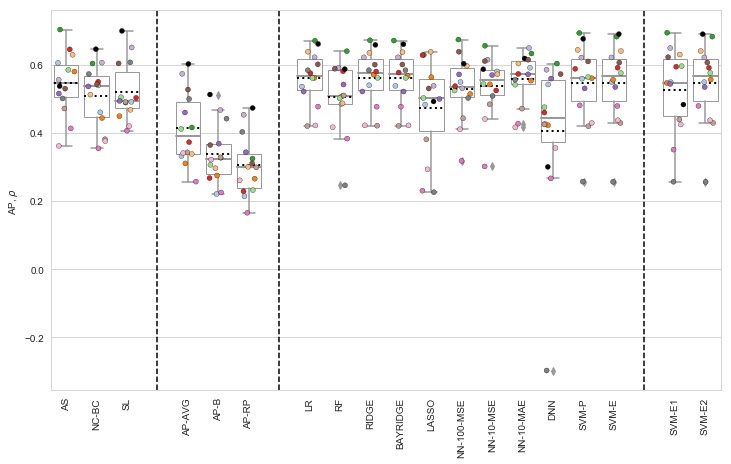

ap-delta


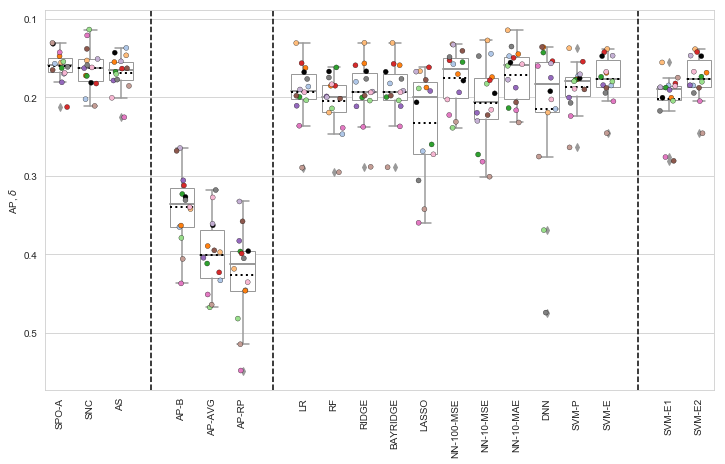

ap-tau


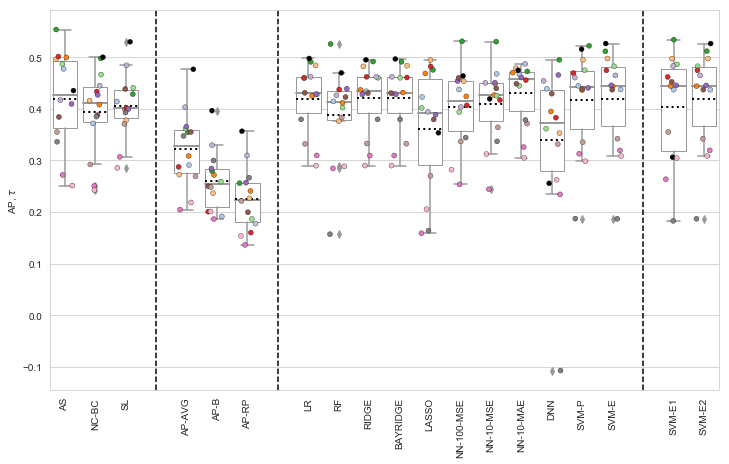

ap-R_s


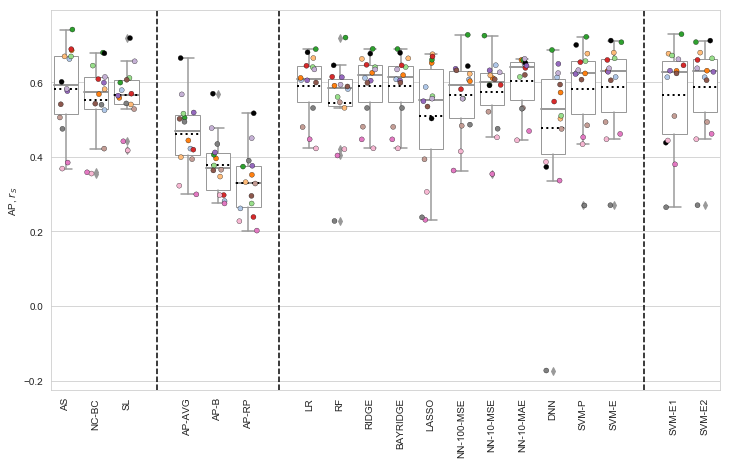

map-rho


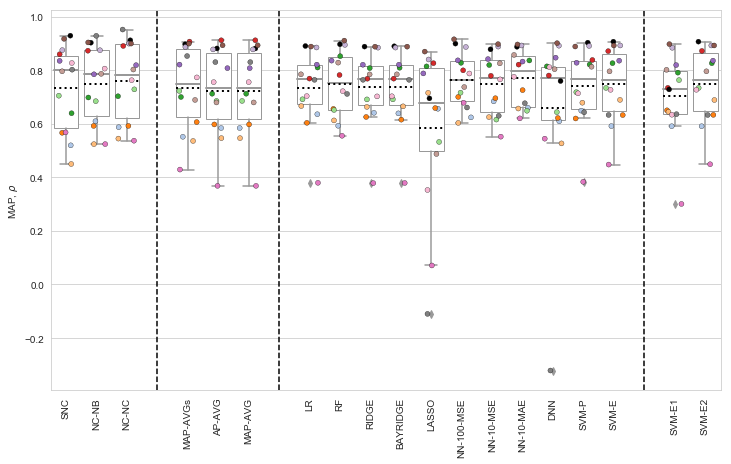

map-tau


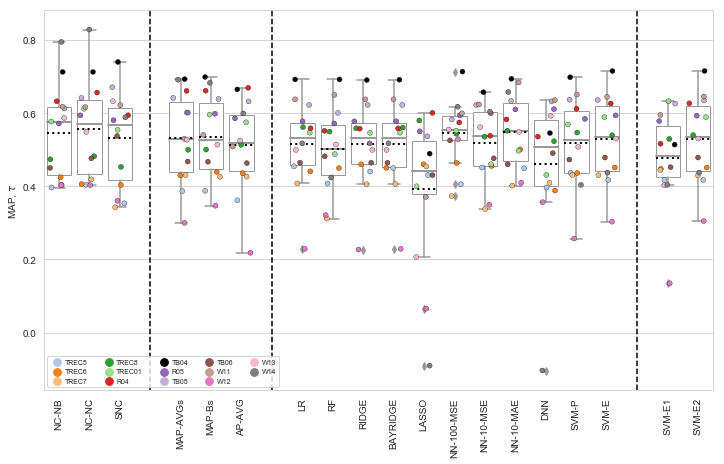

map-R_s


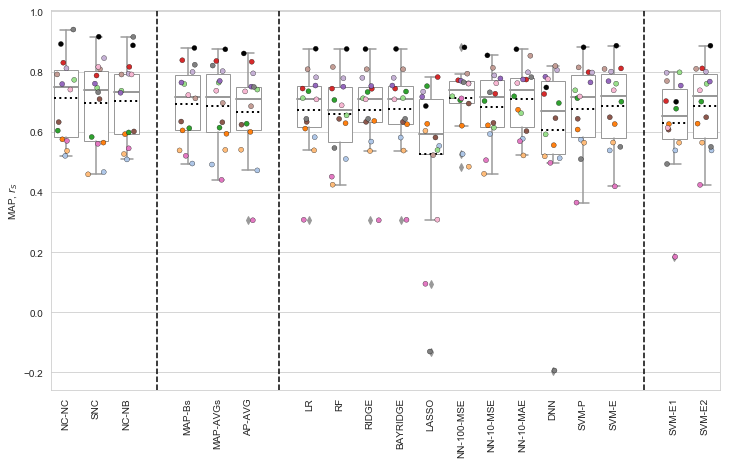

map-tau_AP


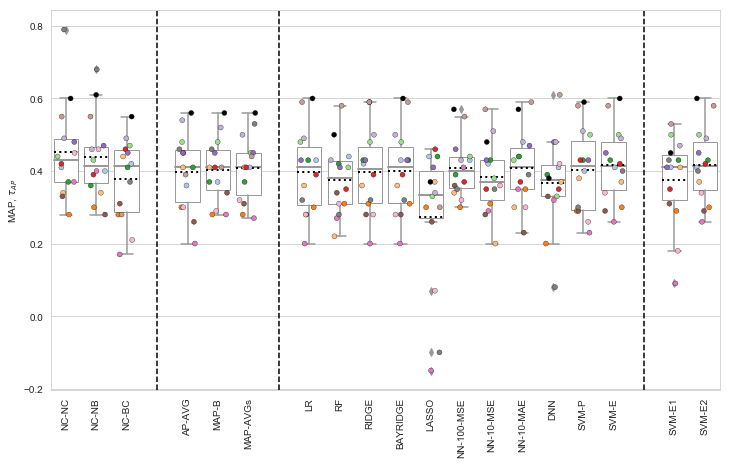

aap-rho


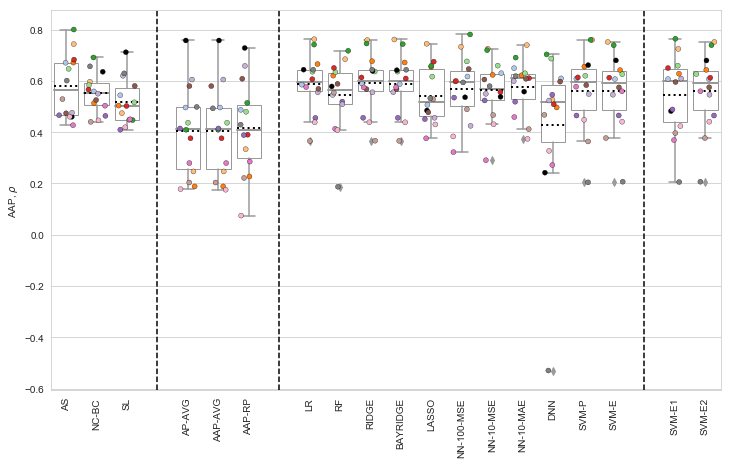

aap-tau


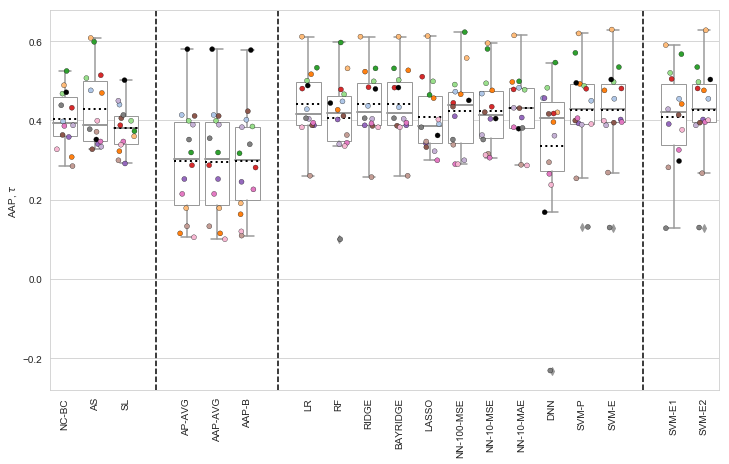

aap-R_s


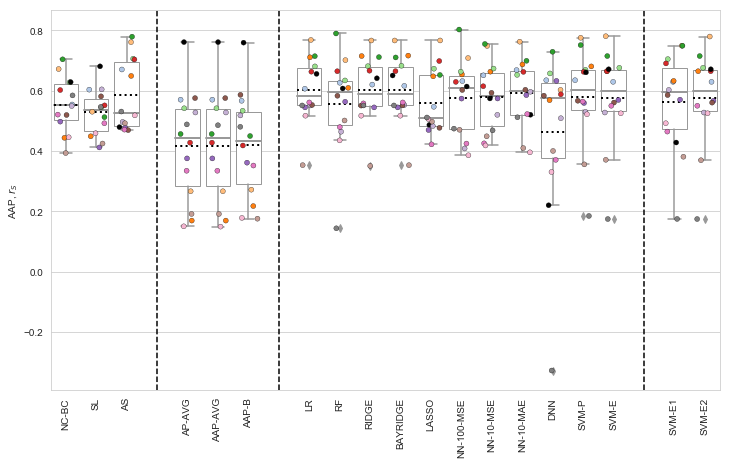

In [33]:
flatui = [#'#1f77b4',
          '#aec7e8','#ff7f0e','#ffbb78','#2ca02c','#98df8a','#d62728','#000000','#9467bd','#c5b0d5',
          '#8c564b','#c49c94','#e377c2','#f7b6d2','#7f7f7f','#c7c7c7','#bcbd22','#dbdb8d','#17becf','#9edae5',]

for apmap in ['ap','map', 'aap']:
    dfp = df.copy()
    #apmap =='ap'

    if apmap =='ap':
        kindcors = ['rho', 'delta', 'tau', 'R_s']
    elif apmap == 'map':
        kindcors = ['rho', 'tau', 'R_s', 'tau_AP']
    elif apmap == 'aap':
        kindcors = ['rho', 'tau', 'R_s']
        
    if apmap =='ap':
        dfp = dfp[~dfp['method'].str.contains('Combino_AAP|Combino_MAP' )]
    elif apmap=='map':
        dfp = dfp[~dfp['method'].str.contains('Combino_AAP' )]
    elif apmap=='aap':
        dfp = dfp[~dfp['method'].str.contains('Combino_MAP' )]
        
    for kindcorr in kindcors:
        #apmap = 'ap'
        #kindcorr = 'delta'
        print('{}-{}'.format(apmap, kindcorr))
        
        aux = dfp[(dfp['apmap']==apmap) & (dfp['kindcorr']==kindcorr)]
        
        # top 3 for Features
        datenere = np.array([])
        
        
        df_agg = aux[(aux['algorithm']=='feature') & (~aux['method'].str.contains('blank'))]
        df_agg = df_agg.groupby(['method']).agg('median')
        if kindcorr=='delta':
            df_agg = df_agg.sort_values(by='corr', ascending=True).index.values[:3]
        else:
            df_agg = df_agg.sort_values(by='corr', ascending=False).index.values[:3]
        #display(df_agg)
        aux = aux[(aux['algorithm']!='feature') | ((aux['algorithm']=='feature')&(aux['method'].isin(df_agg)))] 
        datenere = np.append(datenere, df_agg)
        
        # top 3 for data fusion
        df_agg = aux[(aux['algorithm']!='feature') & (~aux['method'].str.contains('blank')) & (aux['method'].str.contains('Combino'))]
        df_agg = df_agg.groupby(['method']).agg('median')
        if kindcorr=='delta':
            df_agg = df_agg.sort_values(by='corr', ascending=True).index.values[:3]
        else:
            df_agg = df_agg.sort_values(by='corr', ascending=False).index.values[:3]
        
        datenere = np.append(datenere, df_agg)
        aux = aux[ (  ((aux['algorithm']!='feature') | ((aux['algorithm']=='feature')&(aux['method'].isin(datenere)))) &   
                  ((aux['algorithm'].str.contains('Combino')==False) | ((aux['algorithm'].str.contains('Combino'))&(aux['method'].isin(datenere))) )  )
                    ]
        
        
        
        aux.loc[len(aux)] = [np.nan, 'blank', np.nan, np.nan, np.nan, np.nan]
        #display(aux.head(30))
        
        order = list(itertools.chain([datenere[:3], ['blank'], datenere[3:], ['blank'], datenere[6:],
                                      meth_algorithms[meth_algorithms.index('k-LR'):]
                                     ]))
        order = [item for sublist in order for item in sublist]

        
        fig, ax = plt.subplots(figsize=(12,7))
        pages = PdfPages('../../plots/ref-BOX_Top3ML_{}_{}.pdf'.format(apmap, kindcorr))

        jitter = .3; alpha = .99; linewidth = .3; size = 5

        meanp = dict(linestyle=':', linewidth=2, color='#000000')
        medianp = dict(linestyle='-', linewidth=2, color='#999999')
        boxp = dict(linestyle='-', linewidth=1, )

        sns.boxplot(x="method", y="corr", data=aux,  ax=ax,
                         color='#FFFFFF', order = order,
                         showmeans=True, meanline = True, meanprops = meanp, medianprops = medianp, boxprops =  boxp )

        
        ax = sns.stripplot(x="method", y="corr", hue='collection', ax=ax, order = order,
                               data=aux, palette=flatui,
                       jitter=jitter, alpha=alpha, linewidth=linewidth, size=size, marker = 'o'
                              )

        ax.set(title = '{} {}'.format(apmap, kindcorr))
          
        
        # legenda
        h,l = ax.get_legend_handles_labels() 
        l = list(map(map_collection.get, l, l))
        
        if (apmap =='map') & (kindcorr=='tau'):
            ax.legend(h,l, loc='lower left', ncol=5, prop={'size': 7}, handletextpad=0.1, frameon=True)
        else:
            ax.legend_.remove()
       
        if kindcorr=='delta':
            plt.gca().invert_yaxis()
        
        labs = [x.get_text() for x in ax.get_xticklabels()]
        labs = list(map(map_method.get, labs, labs))
        ax.set_xticklabels(labs, rotation=90)  

        
        #  linee
        off=1
        if apmap =='ap':
            xposition = [4, 8, 20 ]
        elif apmap=='map':
            xposition = [4, 8, 20]
        elif apmap=='aap':
             xposition = [4, 8, 20 ]
        for xc in xposition:
            plt.axvline(x=xc-off, color='k', linestyle='--')
        
        # ylabels
        if kindcorr=='rho':
            yl= r'$\rho$'
        elif kindcorr=='tau':
            yl= r'$\tau$'
        elif kindcorr=='delta':
            yl= r'$\delta$'
        elif kindcorr=='R_s':
            yl= r'$r_{S}$'
        elif kindcorr=='tau_AP':
            yl= r'${\tau}_{AP}$'
        
        ax.set( title = ''.format(),
               xlabel = '',
            ylabel = apmap.upper()+', '+yl+''.format(kindcorr)
              )
        
        pages.savefig(bbox_inches='tight')
        pages.close()
        plt.show()
        plt.close()
        #display(aux)

        #assert False
        

In [ ]:
# stat sig

In [8]:
dfst = pd.DataFrame(columns=['apmap', 'kindcor' ,'f1', 'f2', 'kind', 'score' ])
dfsig = df.copy()
dfsig = dfsig[~dfsig['method'].str.contains('blankSpace')]

for apmap in ['ap','map', 'aap']:
    dfp = dfsig.copy()
    if apmap =='ap':
        kindcors = ['rho', 'delta', 'tau', 'R_s']
    elif apmap == 'map':
        kindcors = ['rho', 'tau', 'R_s', 'tau_AP']
    elif apmap == 'aap':
        kindcors = ['rho', 'tau', 'R_s']
        
    if apmap =='ap':
        dfp = dfp[~dfp['method'].str.contains('Combino_AAP|Combino_MAP' )]
    elif apmap=='map':
        dfp = dfp[~dfp['method'].str.contains('Combino_AAP' )]
    elif apmap=='aap':
        dfp = dfp[~dfp['method'].str.contains('Combino_MAP' )]
        
    for kindcorr in kindcors:
        #apmap = 'ap'
        #kindcorr = 'delta'
        
        print('{} - {}'.format(apmap, kindcorr))
        
        aux = dfp[(dfp['apmap']==apmap) & (dfp['kindcorr']==kindcorr)]
        
        feats = [x for x in np.append(meth_algorithms, meth_features) if x in np.unique(aux['method'])]
        
        allpairs = list(itertools.permutations(feats, 2))
    
        for f1, f2 in allpairs:
            #fbl = ['LR', 'M5P', 'NET', 'RF', 'SVM_POLY', 'SVM_RBF']
            #if (f1 in fbl) | (f2 in fbl):
            #    continue
            
        
            x = aux[(aux['method']==f1) & (aux['collection']!=collections[0])]['corr'].values
            y = aux[(aux['method']==f2) & (aux['collection']!=collections[0])]['corr'].values
            
            #display(  aux[(aux['method']==f1) & (aux['collection']!=collections[0])]  )
            #display( aux[(aux['method']==f2) & (aux['collection']!=collections[0])]  )
            #assert False
            
            sig = sp.stats.wilcoxon(x, y)[1]
            
            if sig < 0.01:
                siglab = 1
            elif sig < 0.05:
                siglab = 2
            else:
                siglab = 0
            
            #display(sig)
        
                                 #'apmap', 'kindcor' ,'f1', 'f2', 'kind' 'score'
            dfst.loc[len(dfst)] = [apmap, kindcorr, f1, f2, 'wilcox', siglab]
            
            
            #assert False
dfst.set_index(['apmap', 'kindcor'], inplace=True)           
print('done.')       

ap - rho
ap - delta
ap - tau
ap - R_s
map - rho
map - tau
map - R_s
map - tau_AP
aap - rho
aap - tau
aap - R_s
done.


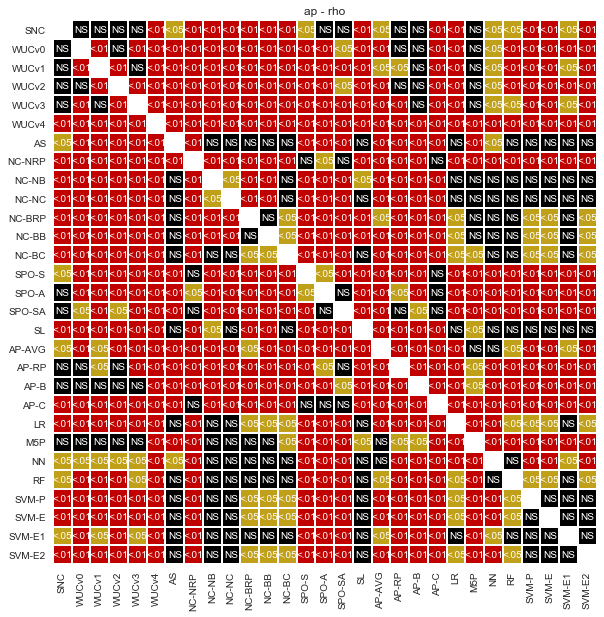

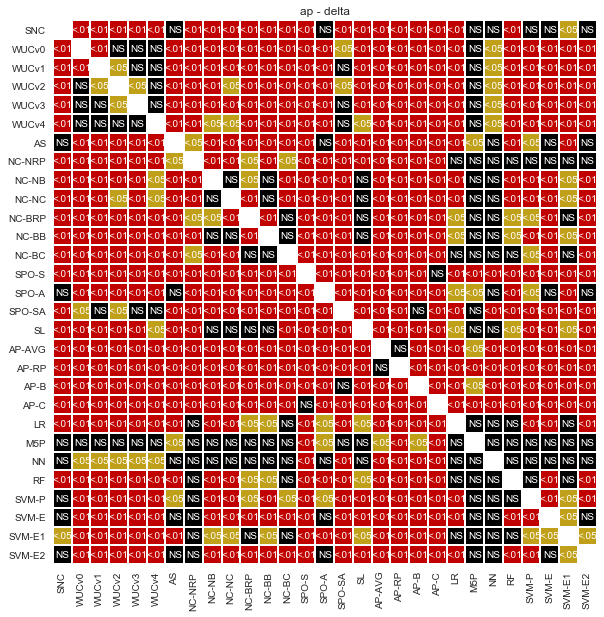

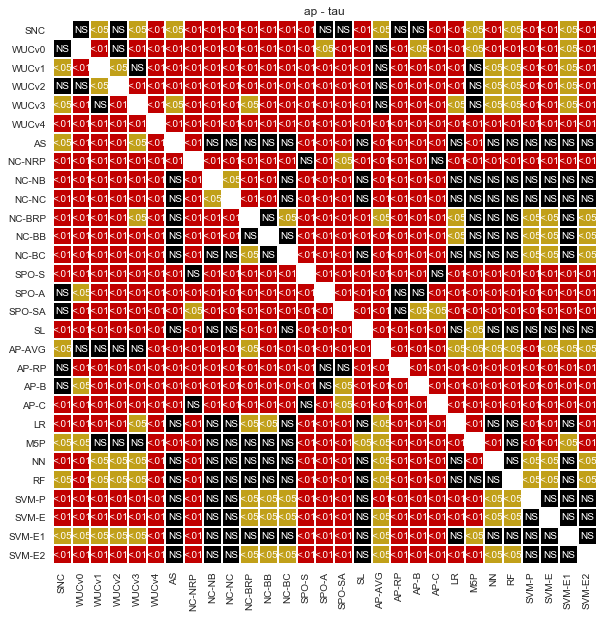

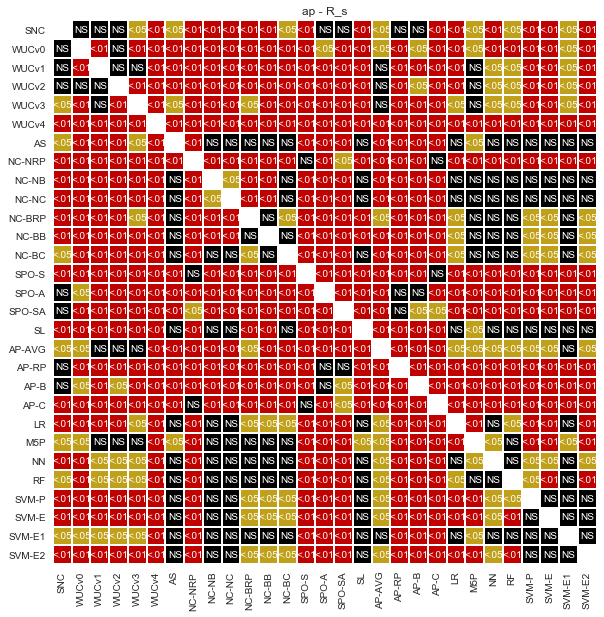

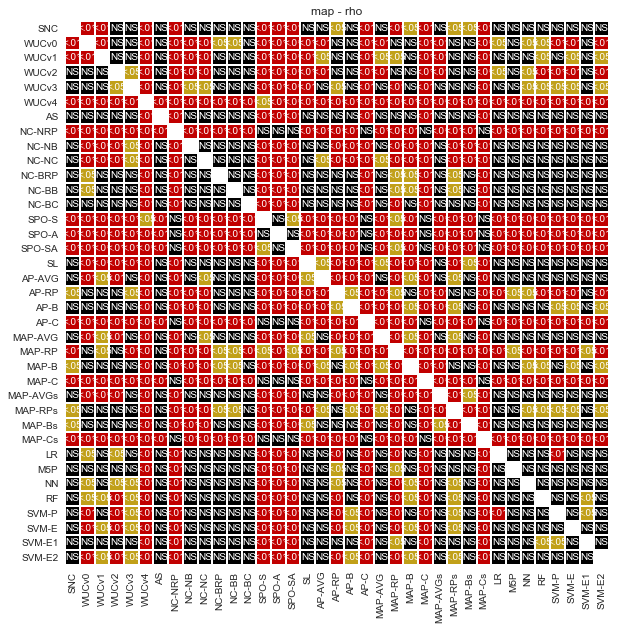

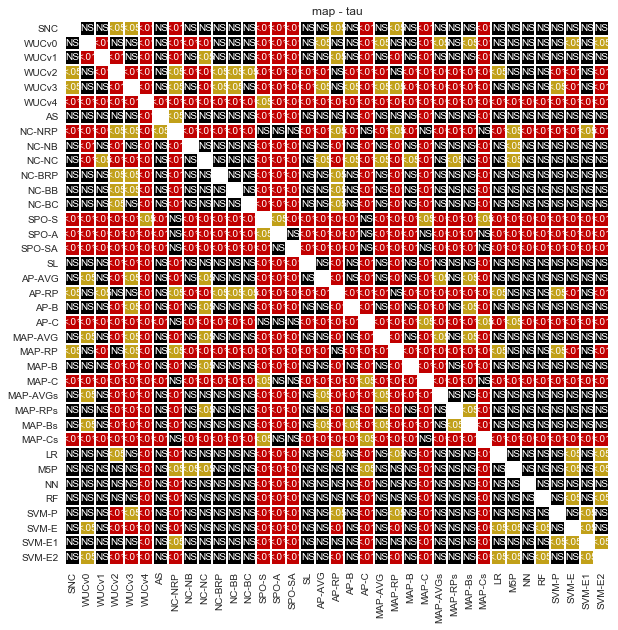

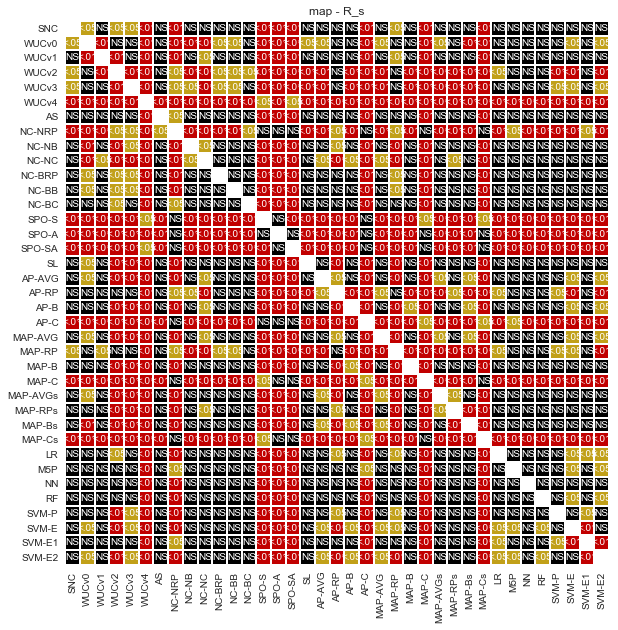

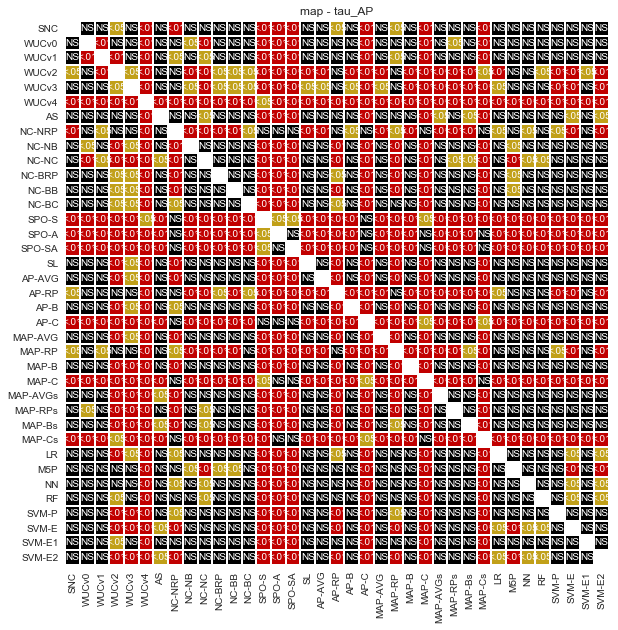

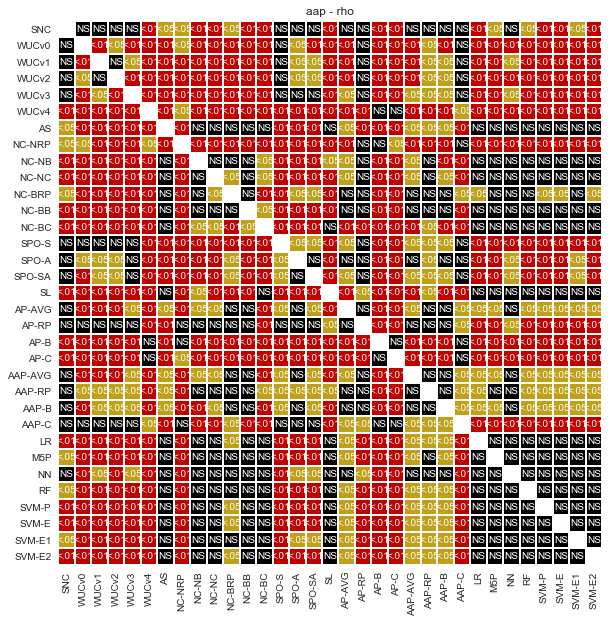

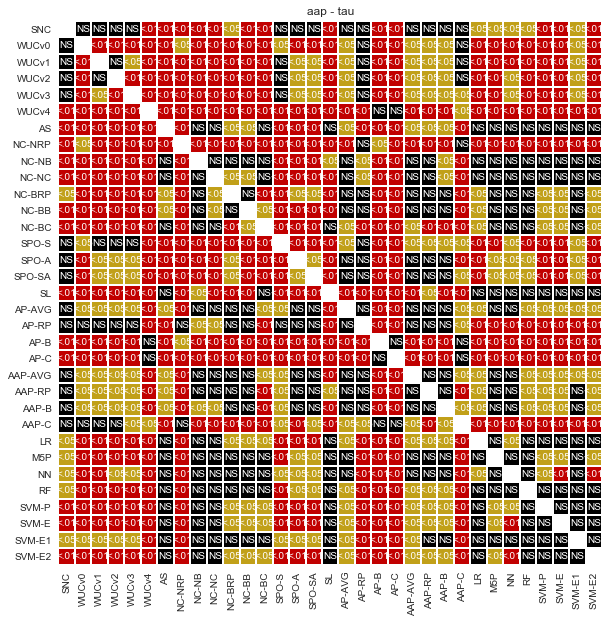

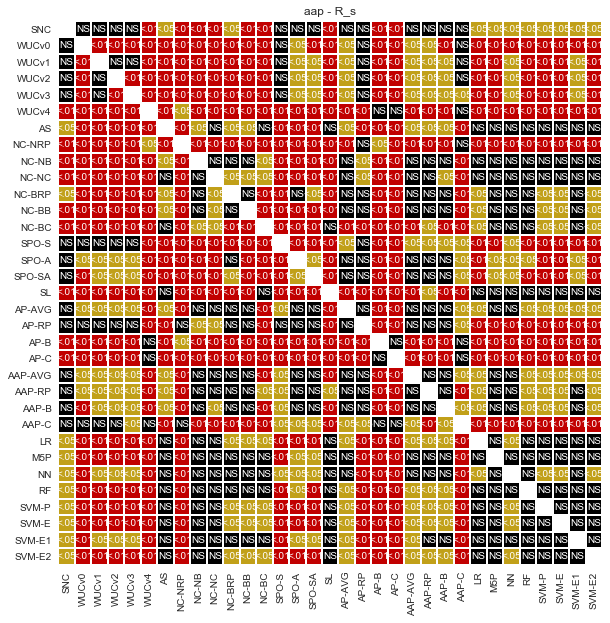

In [9]:
from matplotlib import colors

for apmap in ['ap','map', 'aap']:
    if apmap =='ap':
        kindcors = ['rho', 'delta', 'tau', 'R_s']
    elif apmap == 'map':
        kindcors = ['rho', 'tau', 'R_s', 'tau_AP']
    elif apmap == 'aap':
        kindcors = ['rho', 'tau', 'R_s']
    
    for kindcorr in kindcors:
        
        plt.figure(figsize=(10, 10))
    
        pages = PdfPages('../../plots/Box_top3_plus_ML/Stat_{}_{}.pdf'.format(apmap, kindcorr))

        aux = dfst.loc[apmap, kindcorr]
        aux = aux.pivot('f1', 'f2', 'score')
        
        presfeat = [x for x in np.append(meth_features, meth_algorithms) if x in aux.columns.values]
        
        #print(presfeat)
         
        # sorting and renaming
        aux = aux[presfeat]
        aux.columns = [ map_method[x] if x in map_method.keys() else x for x in aux.columns ] #[map_method[x] for x in aux.columns]
        aux = aux.T
        aux = aux[presfeat]
        aux.columns = [ map_method[x] if x in map_method.keys() else x for x in aux.columns ]
        aux = aux.T
        
        aux.replace(np.nan, 3, inplace=True)

        #index = aux.index.union(aux.columns)
        #aux = aux.reindex(index=index, columns=index, fill_value=1)
        #display(aux)
        
        annott = aux.copy()
        annott.replace({0:'NS', 1:'<.01', 2:'<.05', 3:''}, inplace=True)
        
                                                                                     
        ax = sns.heatmap(aux, annot=annott, square=True, cmap= colors.ListedColormap(['#000000','#c10000','#c1a019','#ffffff']), cbar=False, linewidths=1, fmt = ''  )
        ax.set(title='{} - {}'.format(apmap, kindcorr))

        pages.savefig(bbox_inches='tight')
        pages.close()
        plt.show()

        #assert False